In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#load the dataset
bike = pd.read_csv('daily-bike-share.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


- **instant**: A unique row identifier
- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **season**: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- **temp**: The temperature in celsius (normalized)
- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)
- **hum**: The humidity level (normalized)
- **windspeed**: The windspeed (normalized)
- **rentals**: The number of bicycle rentals recorded.

In [4]:
#day extraction
bike['day'] = pd.DatetimeIndex(bike['dteday']).day
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [5]:
bike.head(31)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
 14  day         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [7]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike[numeric_features+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\steph\AppData\Local\Temp\ipykernel_8924\3744000061.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


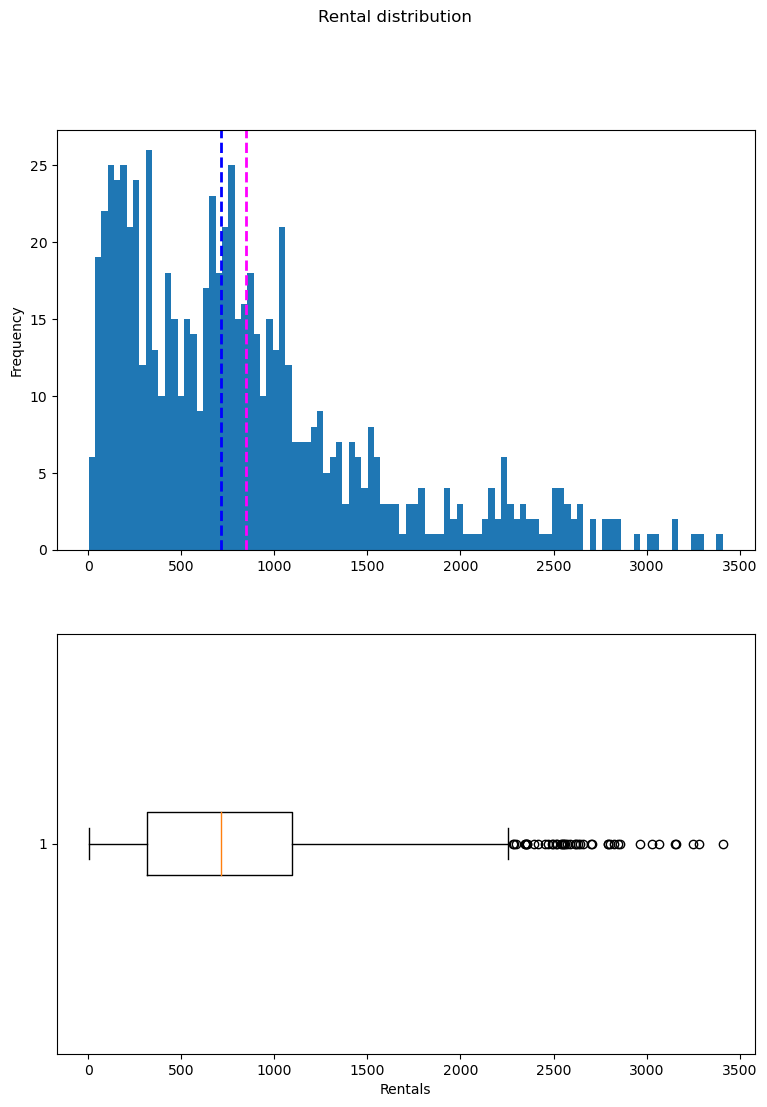

In [8]:
label = bike['rentals']

fig, ax = plt.subplots(2, 1, figsize=(9,12))

#histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
#mean, median and mode lines
ax[0].axvline(label.mean(), c='magenta',ls='dashed', lw=2)
ax[0].axvline(label.median(), c='blue',ls='dashed', lw=2)

#boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

fig.suptitle('Rental distribution')
fig.show()

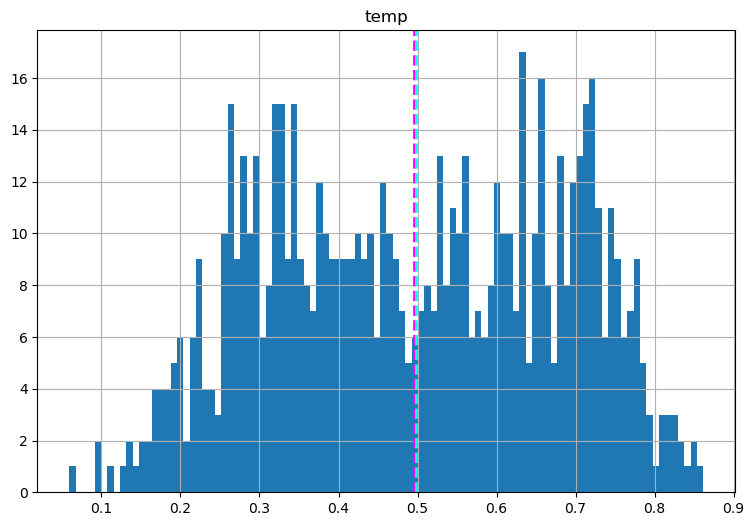

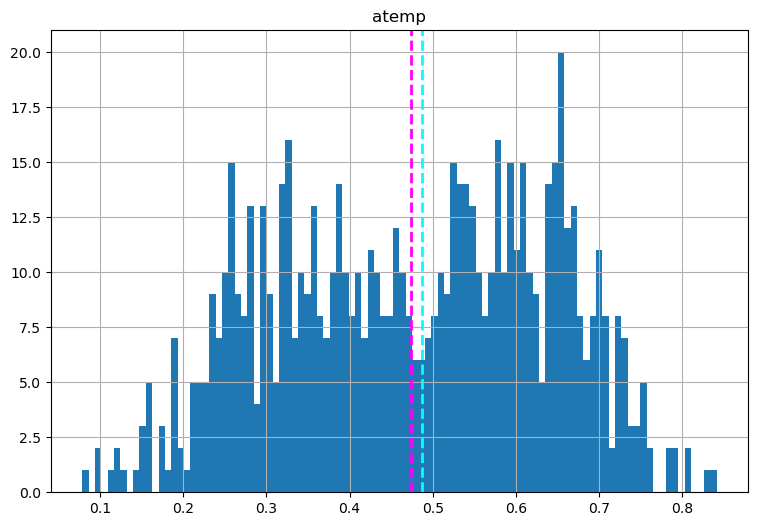

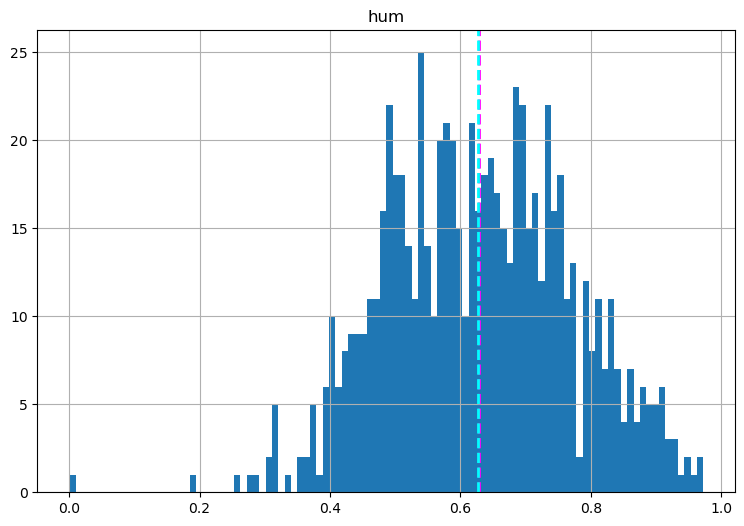

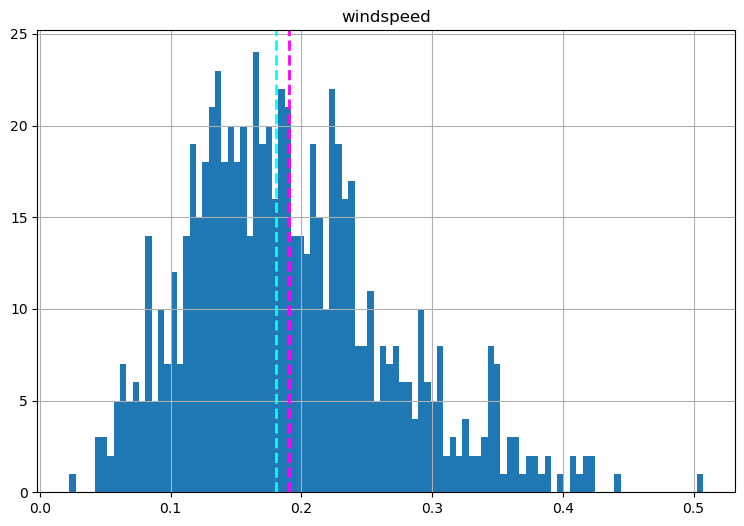

In [9]:
#numeric feature plot
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), c='magenta', ls='dashed', lw=2)
    ax.axvline(feature.median(), c='cyan', ls='dashed', lw=2)
    ax.set_title(col)
plt.show()

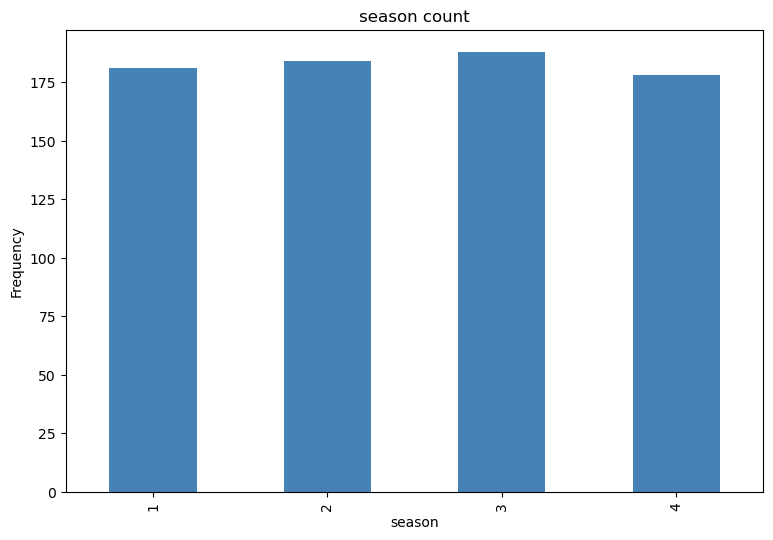

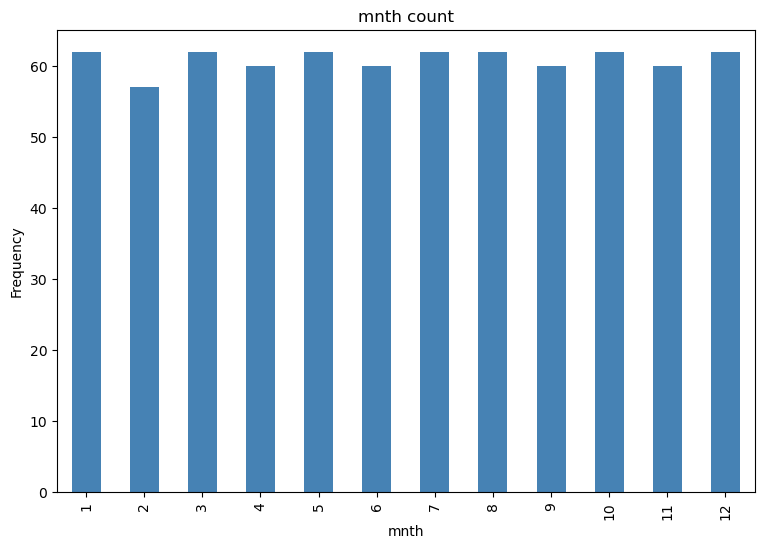

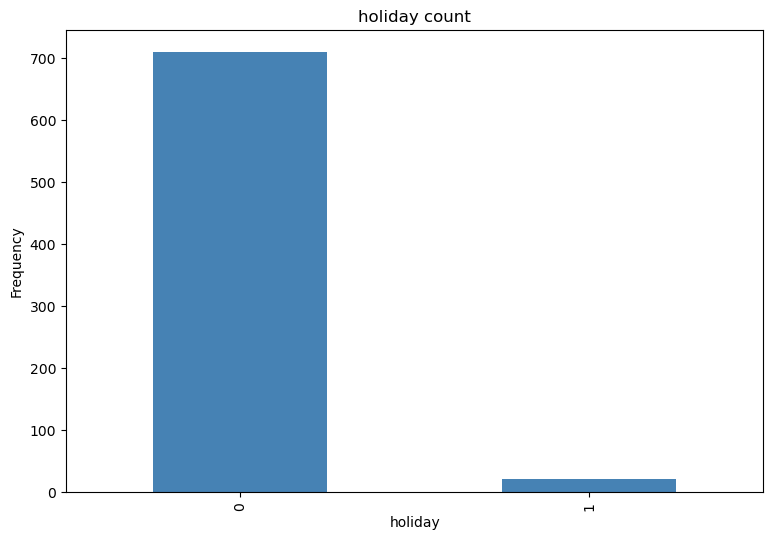

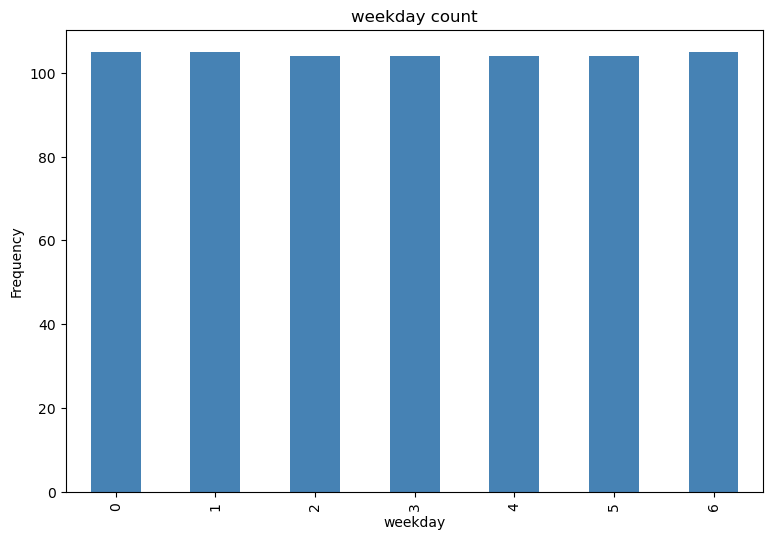

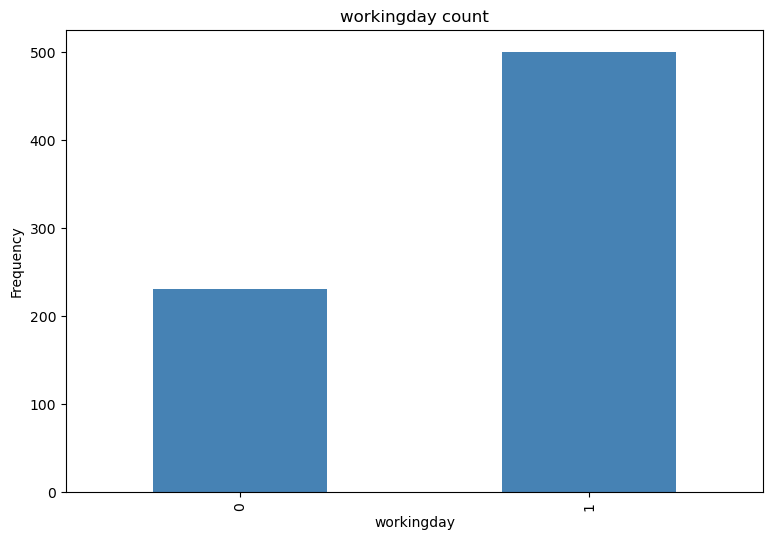

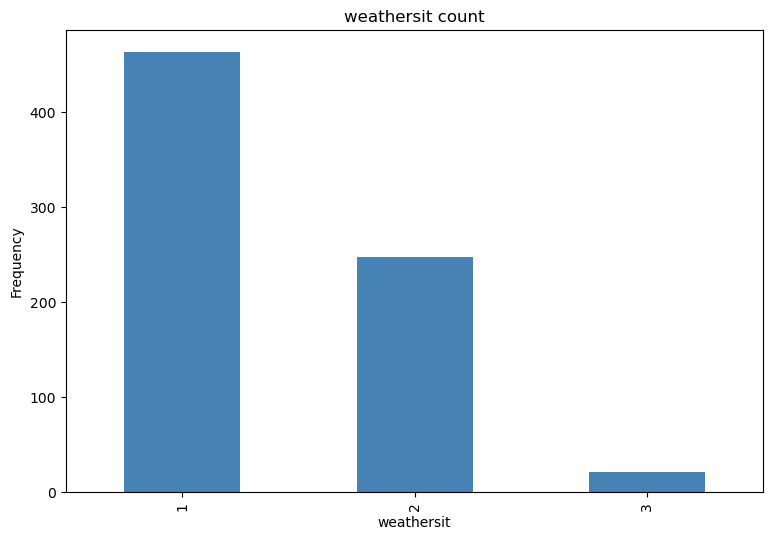

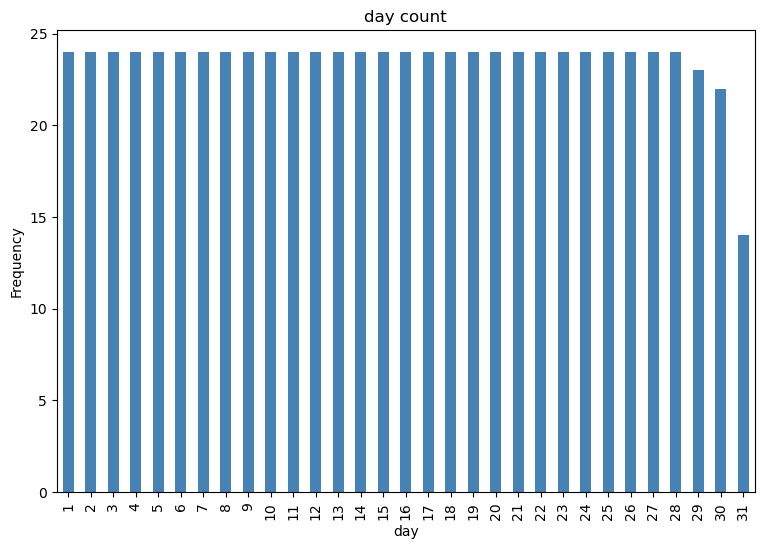

In [10]:
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']

for col in categorical_features:
    counts = bike[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' count')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

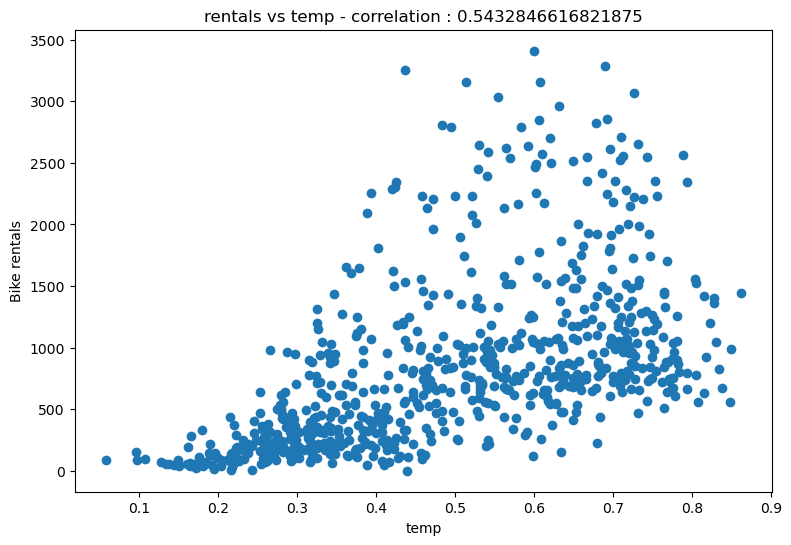

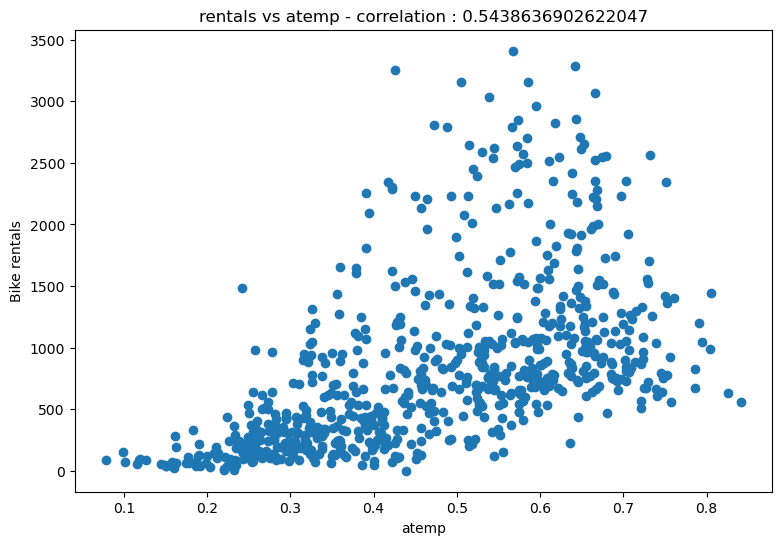

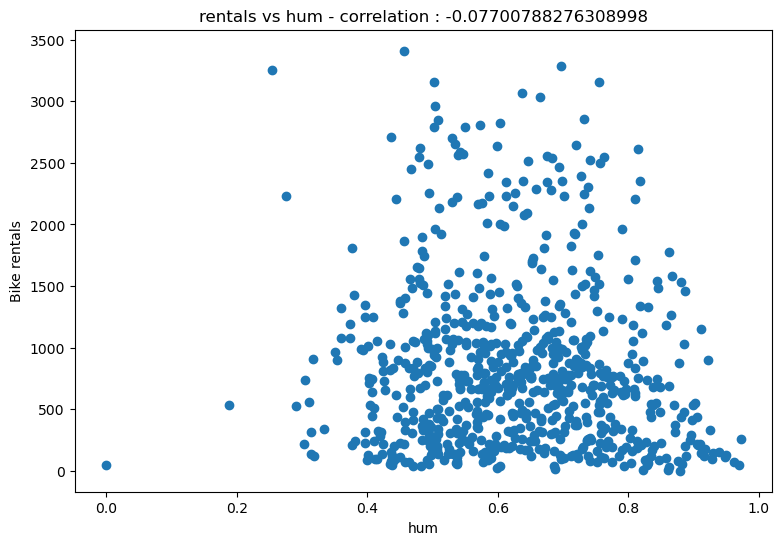

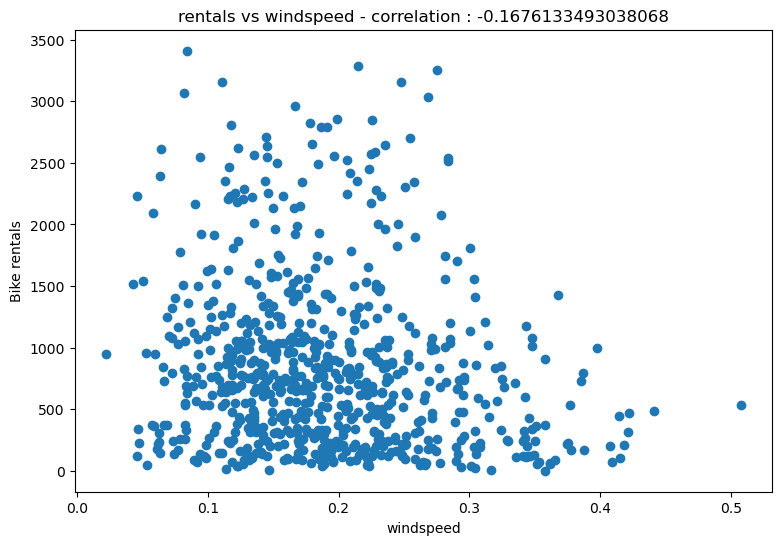

In [11]:
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike[col]
    label = bike['rentals']
    correlation =feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike rentals')
    ax.set_title(f"rentals vs {col} - correlation : {correlation}" )
plt.show()

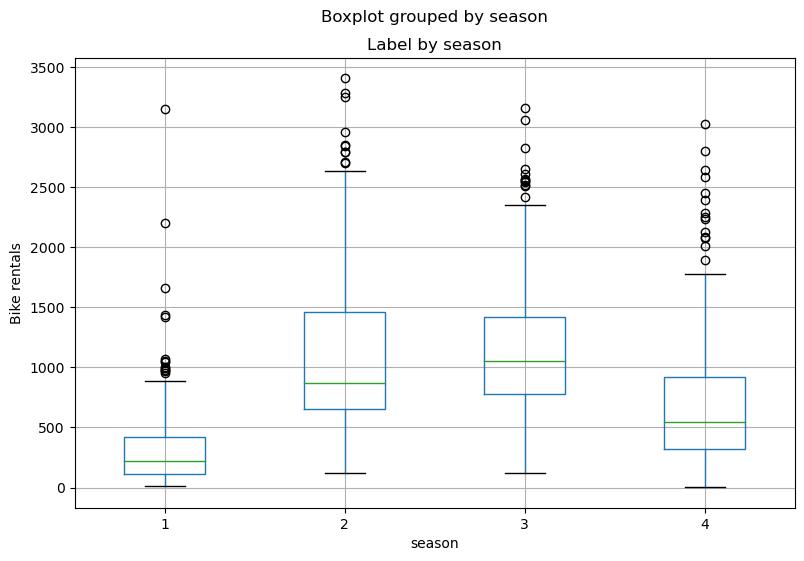

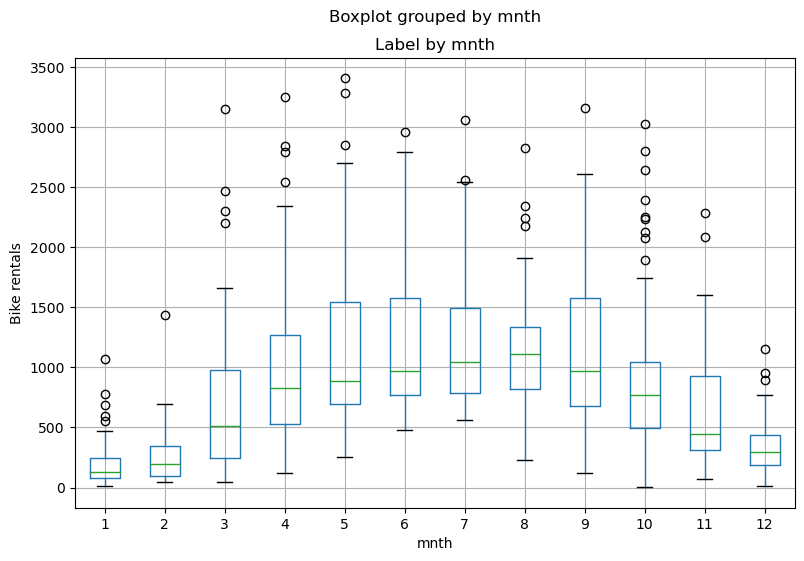

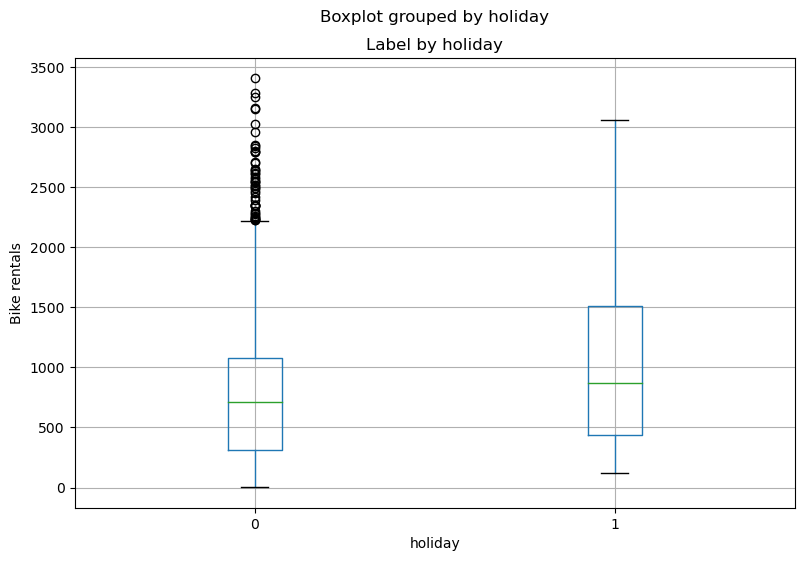

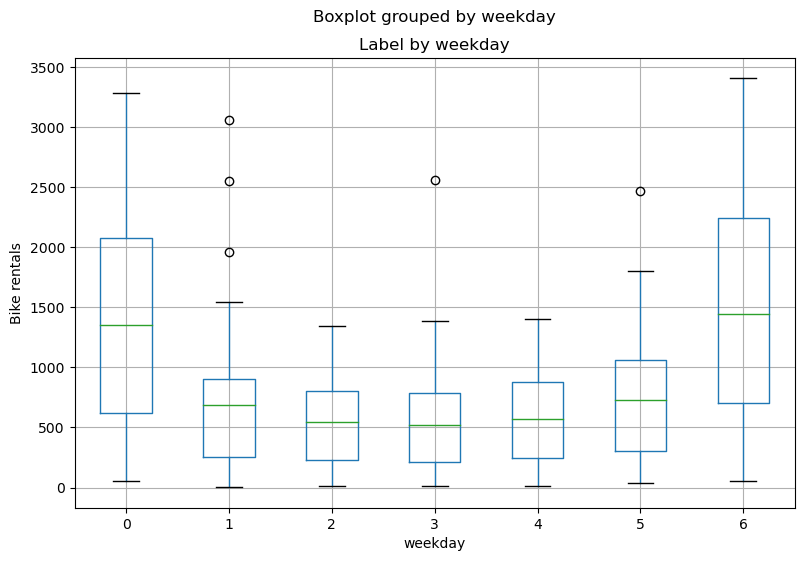

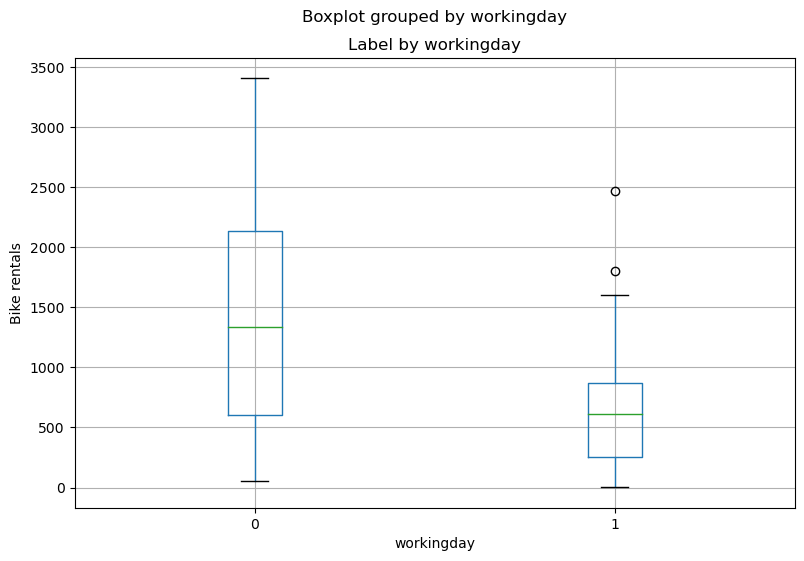

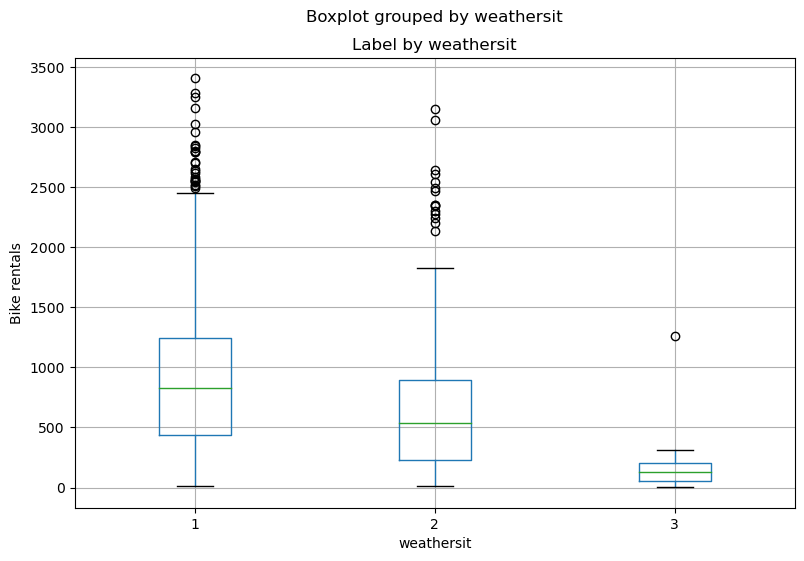

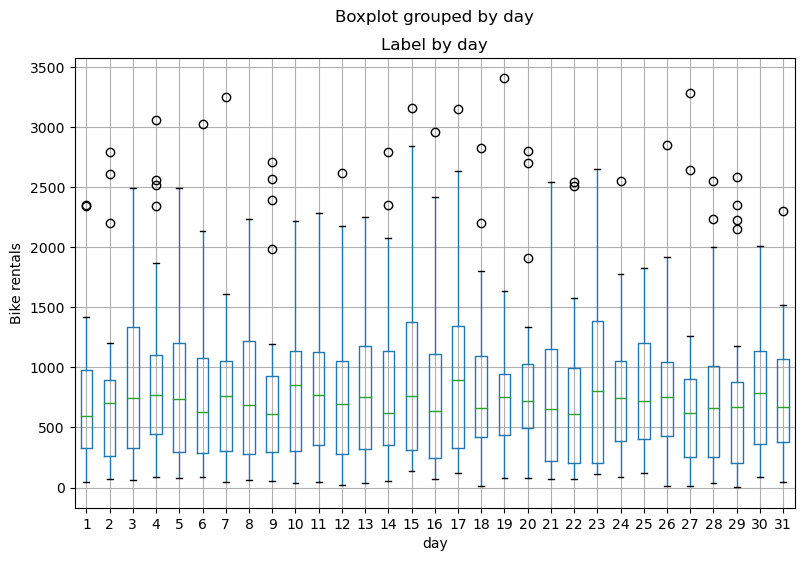

In [12]:
#categorical boxplot
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    bike.boxplot(column= 'rentals', by = col, ax=ax)
    ax.set_title('Label by '+col)
    ax.set_ylabel('Bike rentals')
plt.show()

# Train a Regression Model

In [13]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

In [14]:
#seperate features and labels
X = bike.drop(['instant', 'dteday','rentals','yr', 'day'], axis=1).values
y = bike.rentals.values

print(f'feartures : {X[:10]} \nLabel : {y[:10]}')

feartures : [[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.      

In [15]:
#training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Trained Model

In [17]:
predictions =model.predict(X_test)
np.set_printoptions(suppress=True)

print(f"Predicted label: {np.round(predictions)[:10]} \nActual labels: {y_test[:10]}")

Predicted label: [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.] 
Actual labels: [2418  754  222   47  244  145  240  555 3252   38]


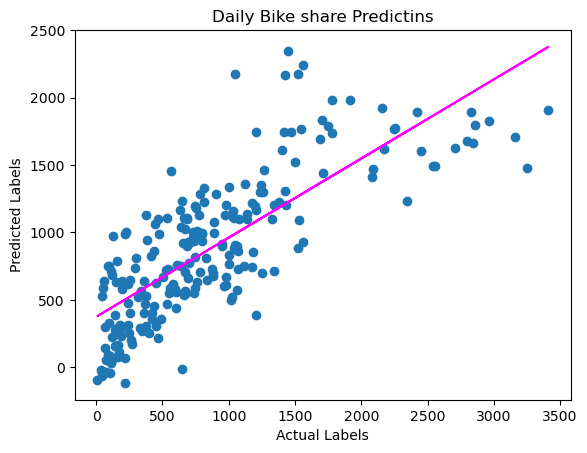

In [18]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike share Predictins')

#overlay the reg
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, predictions)

print(f"MSE : {mse}\nRMSE : {rmse}\nR2 : {r2}")

MSE : 201972.55947035592
RMSE : 449.4135728595165
R2 : 0.6040454736919191


# Lasso algorithm


In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [27]:
#Evaluate the model
predictions = lasso.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE : {mse}\nRMSE : {rmse}\nR2 : {r2}")

MSE : 201155.70593338402
RMSE : 448.5038527519959
R2 : 0.605646863782449


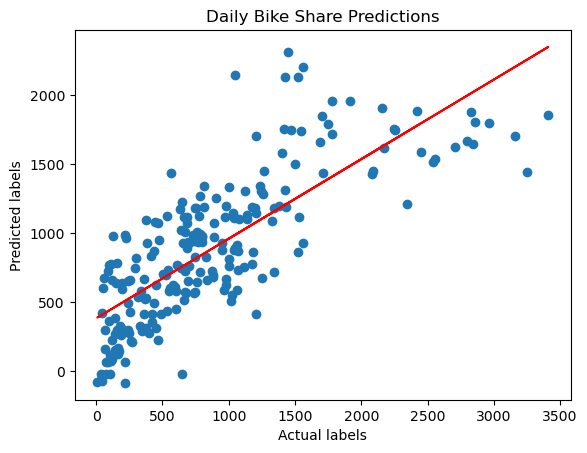

In [28]:
#plot predicted vs actual
plt.scatter(y_test,predictions)
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")
plt.title("Daily Bike Share Predictions")

#Regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), c='r')
plt.show()

# Decision Tree algorithm

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
print(tree_model)

tree = export_text(tree_model)
print(tree)

DecisionTreeRegressor()
|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_7 >  0.28
|   |   |   |   |   |   |   |--- value

In [36]:
predictions = tree_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE : {mse} \nRMSE : {rmse} \nR2 : {r2}")

MSE : 227461.17727272728 
RMSE : 476.92890169576356 
R2 : 0.55407663824887


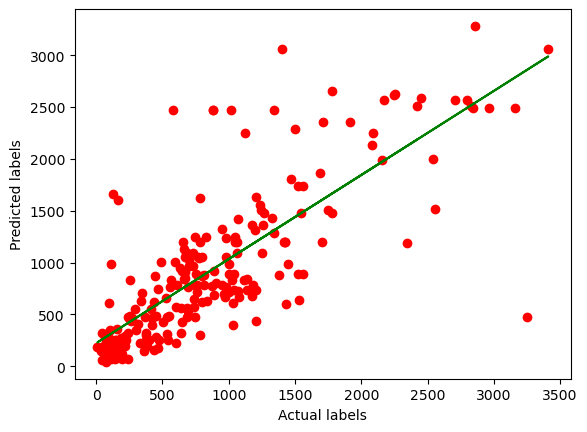

In [37]:
plt.scatter(y_test, predictions, c='r')
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), c='g')

# Ensemble Algorithm

In [38]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
predictions = rforest.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE : {mse} \nRMSE : {rmse} \nR2 : {r2}")

MSE : 113385.47552363637 
RMSE : 336.72759839911606 
R2 : 0.7777148917213806


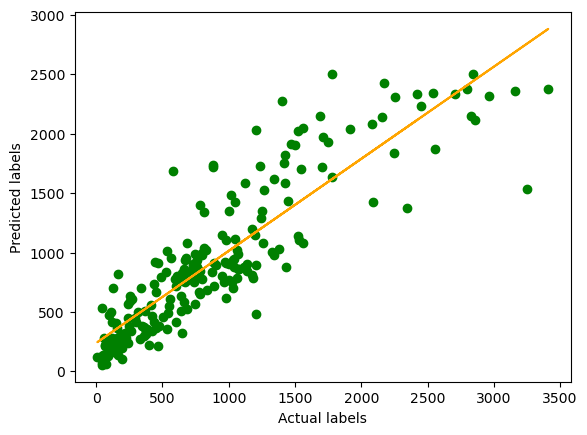

In [42]:
plt.scatter(y_test, predictions, c='g')
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), c='orange')

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [44]:
predictions = gbr.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MSE : {mse} \nRMSE : {rmse} \nR2 : {r2}")

MSE : 104031.46083098359 
RMSE : 322.5390841913327 
R2 : 0.7960528504342907


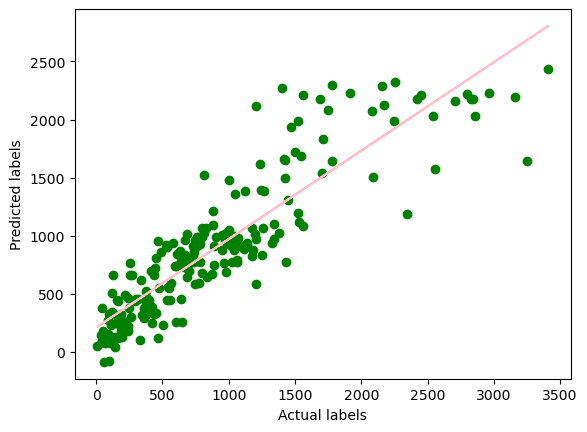

In [45]:
plt.scatter(y_test, predictions, c='g')
plt.xlabel("Actual labels")
plt.ylabel("Predicted labels")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), c='pink')

### KPOVIESSI O. A. Stéphane